### Importing Required Libraries

In [549]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [550]:
df = pd.read_csv("data_network.csv")
df.head()


,flowId,txBytes,rxBytes,txPackets,rxPackets,lostPackets,delaySum_ns,jitterSum_ns,timeFirstTxPacket,timeLastRxPacket,throughput_kbps,source,destination,protocol,sourcePort,destinationPort
0,1,2416,2416,7,7,0,333376000.0,37670400.0,1.0,1.22192,87.094448,10.1.1.1,10.10.5.4,6,49153,8000
1,2,2416,2416,7,7,0,335048000.0,38414400.0,1.0,1.22231,86.941658,10.2.1.1,10.10.5.4,6,49153,8000
2,3,2416,2416,7,7,0,336720000.0,39158400.0,1.0,1.22271,86.785506,10.3.1.1,10.10.5.4,6,49153,8000
3,4,2416,2416,7,7,0,338392000.0,39902400.0,1.0,1.22310,86.633797,10.4.1.1,10.10.5.4,6,49153,8000
4,5,2416,2416,7,7,0,340064000.0,40646400.0,1.0,1.22350,86.478747,10.5.1.1,10.10.5.4,6,49153,8000


In [551]:

df['avg_delay_ms'] = df['delaySum_ns'] / (df['rxPackets'] * 1e6)

df['avg_jitter_ms'] = df['jitterSum_ns'] / (df['rxPackets'] * 1e6)

df['packet_loss_rate'] = df['lostPackets'] / (df['txPackets'] + df['lostPackets'])

df = df[df['rxPackets'] > 0]

### Metrics Visualization

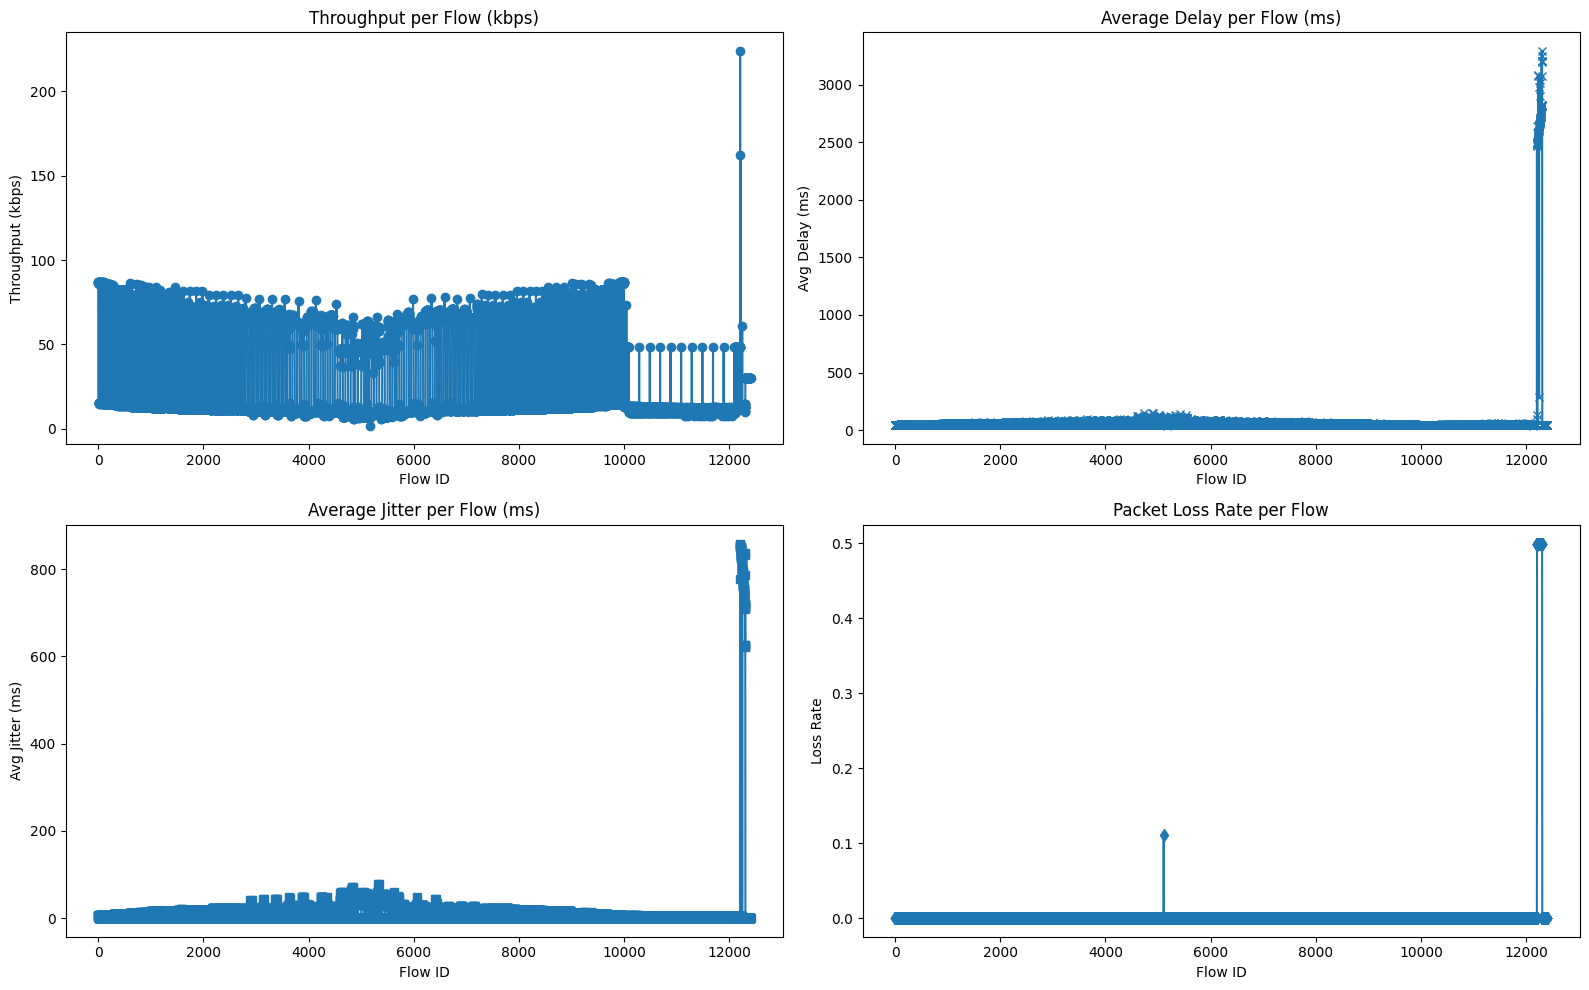

In [552]:
fig, axs = plt.subplots(2, 2, figsize=(16, 10))
axs = axs.flatten()

axs[0].plot(df['flowId'], df['throughput_kbps'], marker='o', linestyle='-')
axs[0].set_title("Throughput per Flow (kbps)")
axs[0].set_xlabel("Flow ID")
axs[0].set_ylabel("Throughput (kbps)")

axs[1].plot(df['flowId'], df['avg_delay_ms'], marker='x', linestyle='-')
axs[1].set_title("Average Delay per Flow (ms)")
axs[1].set_xlabel("Flow ID")
axs[1].set_ylabel("Avg Delay (ms)")

axs[2].plot(df['flowId'], df['avg_jitter_ms'], marker='s', linestyle='-')
axs[2].set_title("Average Jitter per Flow (ms)")
axs[2].set_xlabel("Flow ID")
axs[2].set_ylabel("Avg Jitter (ms)")

axs[3].plot(df['flowId'], df['packet_loss_rate'], marker='d', linestyle='-')
axs[3].set_title("Packet Loss Rate per Flow")
axs[3].set_xlabel("Flow ID")
axs[3].set_ylabel("Loss Rate")

plt.tight_layout()
plt.show()


c:\Users\MSI\anaconda3\envs\gpu_bitirme\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.



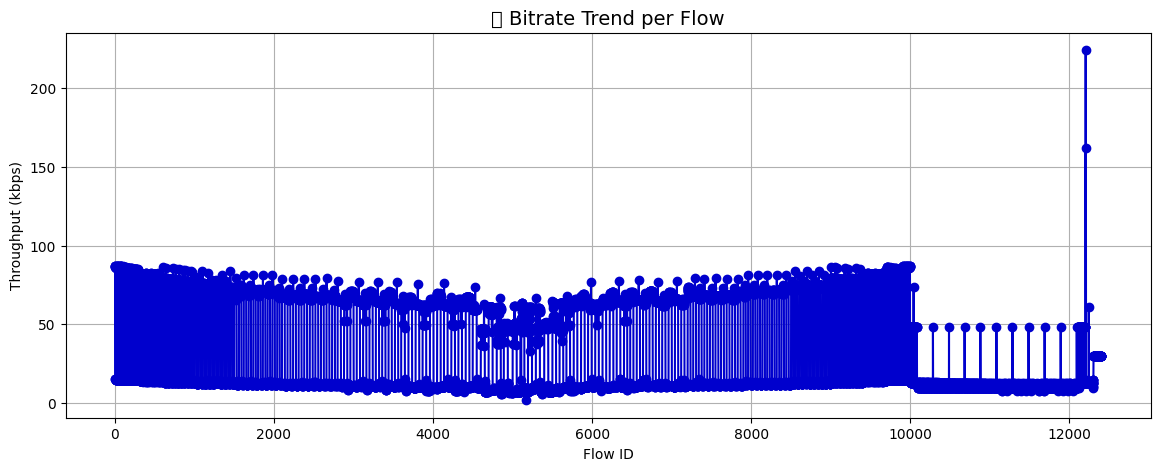

In [553]:
plt.figure(figsize=(14, 5))
plt.plot(df['flowId'], df['throughput_kbps'], marker='o', linestyle='-', color='mediumblue')
plt.title("🔵 Bitrate Trend per Flow", fontsize=14)
plt.xlabel("Flow ID")
plt.ylabel("Throughput (kbps)")
plt.grid(True)
plt.show()

c:\Users\MSI\anaconda3\envs\gpu_bitirme\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128309 (\N{LARGE BLUE CIRCLE}) missing from font(s) DejaVu Sans.



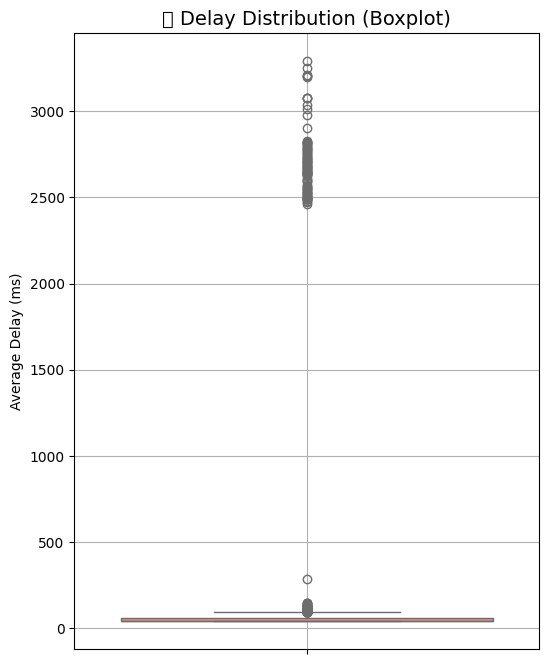

In [554]:
plt.figure(figsize=(6, 8))
sns.boxplot(y=df['avg_delay_ms'], color='salmon')
plt.title("🔵 Delay Distribution (Boxplot)", fontsize=14)
plt.ylabel("Average Delay (ms)")
plt.grid(True)
plt.show()

In [555]:
df['protocol_name'] = df['protocol'].map({6: 'TCP', 17: 'UDP'})
df['protocol_name'].fillna('Other', inplace=True)

C:\Users\MSI\AppData\Local\Temp\ipykernel_9876\2539341720.py:2: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.





In [556]:
protocol_stats = df.groupby('protocol_name')[['throughput_kbps', 'avg_delay_ms', 'packet_loss_rate']].mean()
protocol_stats.drop("packet_loss_rate", axis=1, inplace=True)

c:\Users\MSI\anaconda3\envs\gpu_bitirme\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.



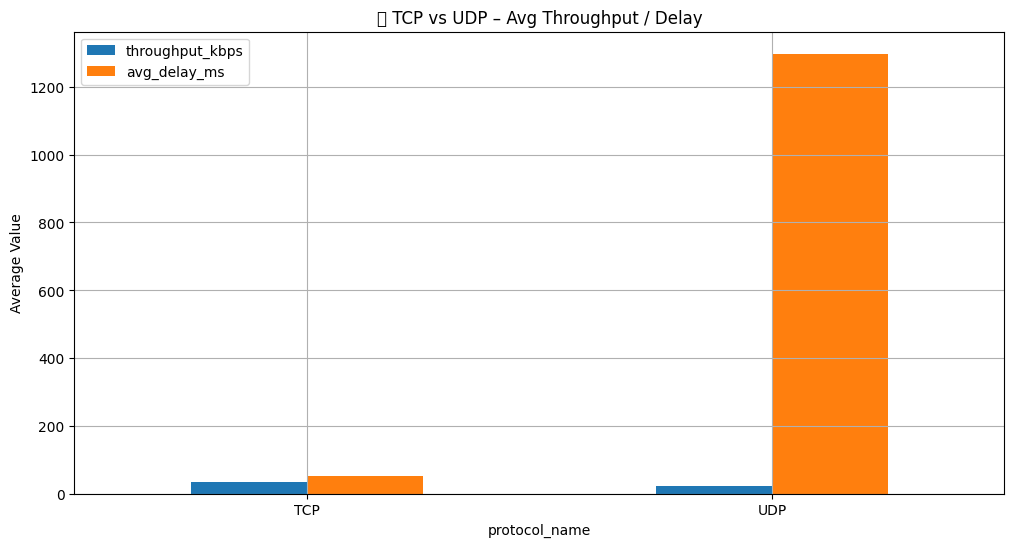

In [558]:
protocol_stats.plot(kind='bar', figsize=(12, 6))
plt.title("🎯 TCP vs UDP – Avg Throughput / Delay")
plt.ylabel("Average Value")
plt.grid(True)
plt.xticks(rotation=0)
plt.show()

C:\Users\MSI\AppData\Local\Temp\ipykernel_9876\558153473.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


c:\Users\MSI\anaconda3\envs\gpu_bitirme\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 128225 (\N{SATELLITE ANTENNA}) missing from font(s) DejaVu Sans.



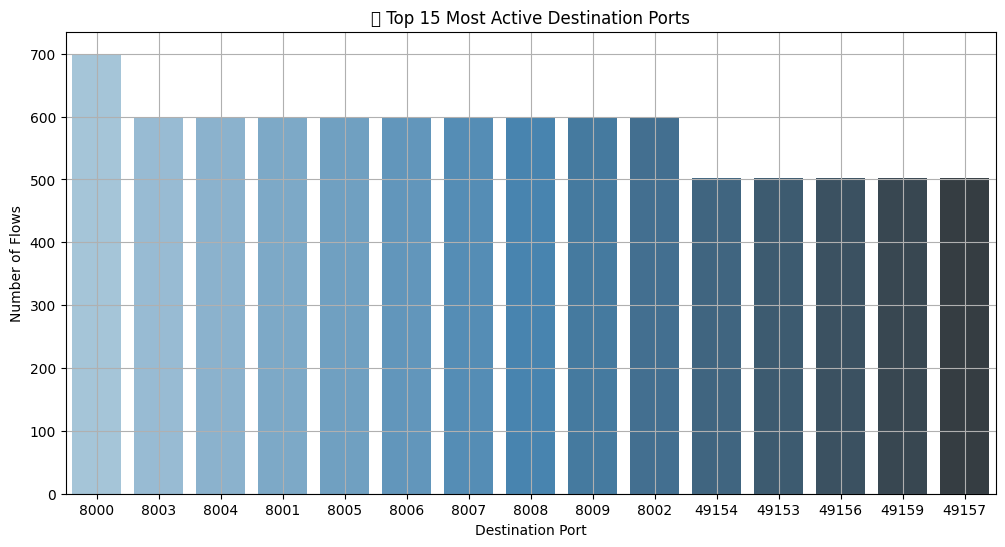

In [300]:
top_ports = df['destinationPort'].value_counts().head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=top_ports.index.astype(str), y=top_ports.values, palette='Blues_d')
plt.title("📡 Top 15 Most Active Destination Ports")
plt.xlabel("Destination Port")
plt.ylabel("Number of Flows")
plt.grid(True)
plt.show()


In [301]:
attackerA_ip = "10.1.200.1"
attackerB_ip = "10.2.200.1"
attackerC_ip = "10.3.200.1"
attackerD_ip = "10.4.200.1"
attackerE_ip = "10.5.200.1"  # düzeltildi: E saldırganı subnetE'den

# Protokol mapping
df["protocol"] = df["protocol"].astype(int)  # olası string türünü integer’a çevir


df["udp_flood"] = (
    (df["source"] == attackerA_ip) &
    (df["destinationPort"].between(9000, 9100)) &
    (df["protocol"] == 17)
)

df["udp_scan"] = (
    (df["source"] == attackerB_ip) &
    (df["protocol"] == 17) &
    (df["txPackets"] == 1) &
    (df["destinationPort"].between(9001, 9100))
)

df["tcp_brute"] = (
    (df["source"] == attackerC_ip) &
    (df["protocol"] == 6) &
    (df["destinationPort"] == 8000) &
    (df["rxBytes"] < 2000)
)

df["icmp_flood"] = (
    (df["source"] == attackerD_ip) &
    (df["txPackets"] > 100)
)

df["tcp_reset"] = (
    (df["source"] == attackerE_ip) &
    (df["protocol"] == 6) &
    (df["rxBytes"] < 500)
)
def label_attack(row):
    if row["udp_flood"]:
        return "udp_flood"
    elif row["udp_scan"]:
        return "udp_scan"
    elif row["tcp_brute"]:
        return "tcp_brute"
    elif row["icmp_flood"]:
        return "icmp_flood"
    elif row["tcp_reset"]:
        return "tcp_reset"
    else:
        return "normal"

df["attack_type"] = df.apply(label_attack, axis=1)
df["attack_type"].value_counts()


attack_type
normal        11100
tcp_reset      1000
tcp_brute       100
udp_scan        100
udp_flood        95
icmp_flood        1
Name: count, dtype: int64

In [302]:
df.head(10)  # İlk 10 satırı göster

,flowId,txBytes,rxBytes,txPackets,rxPackets,lostPackets,delaySum_ns,jitterSum_ns,timeFirstTxPacket,timeLastRxPacket,...,avg_delay_ms,avg_jitter_ms,packet_loss_rate,protocol_name,udp_flood,udp_scan,tcp_brute,icmp_flood,tcp_reset,attack_type
0,1,2416,2416,7,7,0,333376000.0,37670400.0,1.00000,1.22192,...,47.625143,5.381486,0.0,TCP,False,False,False,False,False,normal
1,2,2416,2416,7,7,0,335048000.0,38414400.0,1.00000,1.22231,...,47.864000,5.487771,0.0,TCP,False,False,False,False,False,normal
2,3,2416,2416,7,7,0,336720000.0,39158400.0,1.00000,1.22271,...,48.102857,5.594057,0.0,TCP,False,False,False,False,False,normal
3,4,2416,2416,7,7,0,338392000.0,39902400.0,1.00000,1.22310,...,48.341714,5.700343,0.0,TCP,False,False,False,False,False,normal
4,5,2416,2416,7,7,0,340064000.0,40646400.0,1.00000,1.22350,...,48.580571,5.806629,0.0,TCP,False,False,False,False,False,normal
5,6,264,264,5,5,0,203062000.0,470400.0,1.04056,1.18140,...,40.612400,0.094080,0.0,TCP,False,False,False,False,False,normal
6,7,264,264,5,5,0,203062000.0,470400.0,1.04060,1.18179,...,40.612400,0.094080,0.0,TCP,False,False,False,False,False,normal
7,8,264,264,5,5,0,203062000.0,470400.0,1.04065,1.18219,...,40.612400,0.094080,0.0,TCP,False,False,False,False,False,normal
8,9,264,264,5,5,0,203062000.0,470400.0,1.04070,1.18258,...,40.612400,0.094080,0.0,TCP,False,False,False,False,False,normal
9,10,264,264,5,5,0,203062000.0,470400.0,1.04074,1.18298,...,40.612400,0.094080,0.0,TCP,False,False,False,False,False,normal


In [303]:
df.columns

Index(['flowId', 'txBytes', 'rxBytes', 'txPackets', 'rxPackets', 'lostPackets',
       'delaySum_ns', 'jitterSum_ns', 'timeFirstTxPacket', 'timeLastRxPacket',
       'throughput_kbps', 'source', 'destination', 'protocol', 'sourcePort',
       'destinationPort', 'avg_delay_ms', 'avg_jitter_ms', 'packet_loss_rate',
       'protocol_name', 'udp_flood', 'udp_scan', 'tcp_brute', 'icmp_flood',
       'tcp_reset', 'attack_type'],
      dtype='object')

In [305]:
df = df[['flowId', 'txBytes', 'rxBytes', 'txPackets', 'rxPackets', 'lostPackets',
       'delaySum_ns', 'jitterSum_ns', 'timeFirstTxPacket', 'timeLastRxPacket',
       'throughput_kbps', 'source', 'destination', 'sourcePort',
       'destinationPort', 'avg_delay_ms', 'avg_jitter_ms', 'packet_loss_rate',
       'protocol_name', 'attack_type']]

In [306]:
df.attack_type.value_counts()

attack_type
normal        11100
tcp_reset      1000
tcp_brute       100
udp_scan        100
udp_flood        95
icmp_flood        1
Name: count, dtype: int64

In [307]:
### attack type normal değilse 1 yaz, normal ise 0 yaz
df['is_anomaly'] = df['attack_type'].apply(lambda x: 1 if x != 'normal' else 0)

C:\Users\MSI\AppData\Local\Temp\ipykernel_9876\1001514335.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [308]:
df['is_anomaly'].value_counts()

is_anomaly
0    11100
1     1296
Name: count, dtype: int64

In [309]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.metrics import classification_report, confusion_matrix

In [310]:
df

,flowId,txBytes,rxBytes,txPackets,rxPackets,lostPackets,delaySum_ns,jitterSum_ns,timeFirstTxPacket,timeLastRxPacket,...,source,destination,sourcePort,destinationPort,avg_delay_ms,avg_jitter_ms,packet_loss_rate,protocol_name,attack_type,is_anomaly
0,1,2416,2416,7,7,0,333376000.0,37670400.0,1.00,1.22192,...,10.1.1.1,10.10.5.4,49153,8000,47.625143,5.381486,0.0,TCP,normal,0
1,2,2416,2416,7,7,0,335048000.0,38414400.0,1.00,1.22231,...,10.2.1.1,10.10.5.4,49153,8000,47.864000,5.487771,0.0,TCP,normal,0
2,3,2416,2416,7,7,0,336720000.0,39158400.0,1.00,1.22271,...,10.3.1.1,10.10.5.4,49153,8000,48.102857,5.594057,0.0,TCP,normal,0
3,4,2416,2416,7,7,0,338392000.0,39902400.0,1.00,1.22310,...,10.4.1.1,10.10.5.4,49153,8000,48.341714,5.700343,0.0,TCP,normal,0
4,5,2416,2416,7,7,0,340064000.0,40646400.0,1.00,1.22350,...,10.5.1.1,10.10.5.4,49153,8000,48.580571,5.806629,0.0,TCP,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12396,12397,156,156,1,1,0,41516800.0,0.0,110.96,111.00200,...,10.2.200.1,10.10.5.4,49248,9096,41.516800,0.000000,0.0,UDP,udp_scan,1
12397,12398,156,156,1,1,0,41516800.0,0.0,110.97,111.01200,...,10.2.200.1,10.10.5.4,49249,9097,41.516800,0.000000,0.0,UDP,udp_scan,1
12398,12399,156,156,1,1,0,41516800.0,0.0,110.98,111.02200,...,10.2.200.1,10.10.5.4,49250,9098,41.516800,0.000000,0.0,UDP,udp_scan,1
12399,12400,156,156,1,1,0,41516800.0,0.0,110.99,111.03200,...,10.2.200.1,10.10.5.4,49251,9099,41.516800,0.000000,0.0,UDP,udp_scan,1


In [311]:
df.columns

Index(['flowId', 'txBytes', 'rxBytes', 'txPackets', 'rxPackets', 'lostPackets',
       'delaySum_ns', 'jitterSum_ns', 'timeFirstTxPacket', 'timeLastRxPacket',
       'throughput_kbps', 'source', 'destination', 'sourcePort',
       'destinationPort', 'avg_delay_ms', 'avg_jitter_ms', 'packet_loss_rate',
       'protocol_name', 'attack_type', 'is_anomaly'],
      dtype='object')

In [513]:
features = [
    "txBytes", "rxBytes", "txPackets", "rxPackets", "lostPackets",
    "delaySum_ns", "jitterSum_ns", "throughput_kbps",
    "avg_delay_ms", "avg_jitter_ms", "packet_loss_rate"
]

X = df[features]
y = df["is_anomaly"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [514]:
iso = IsolationForest(n_estimators=500, contamination=0.01, random_state=42)
df["anomaly_pred"] = iso.fit_predict(X_scaled)

# IsolationForest: -1 anormal, 1 normal -> binary etikete çevir
df["anomaly_pred"] = (df["anomaly_pred"] == -1).astype(int)

In [515]:
print(confusion_matrix(y, df["anomaly_pred"]))
print(classification_report(y, df["anomaly_pred"]))

[[11089    11]
 [ 1201    95]]
              precision    recall  f1-score   support

           0       0.90      1.00      0.95     11100
           1       0.90      0.07      0.14      1296

    accuracy                           0.90     12396
   macro avg       0.90      0.54      0.54     12396
weighted avg       0.90      0.90      0.86     12396



In [516]:
!pip install imblearn

### Isolation forest

<Axes: >

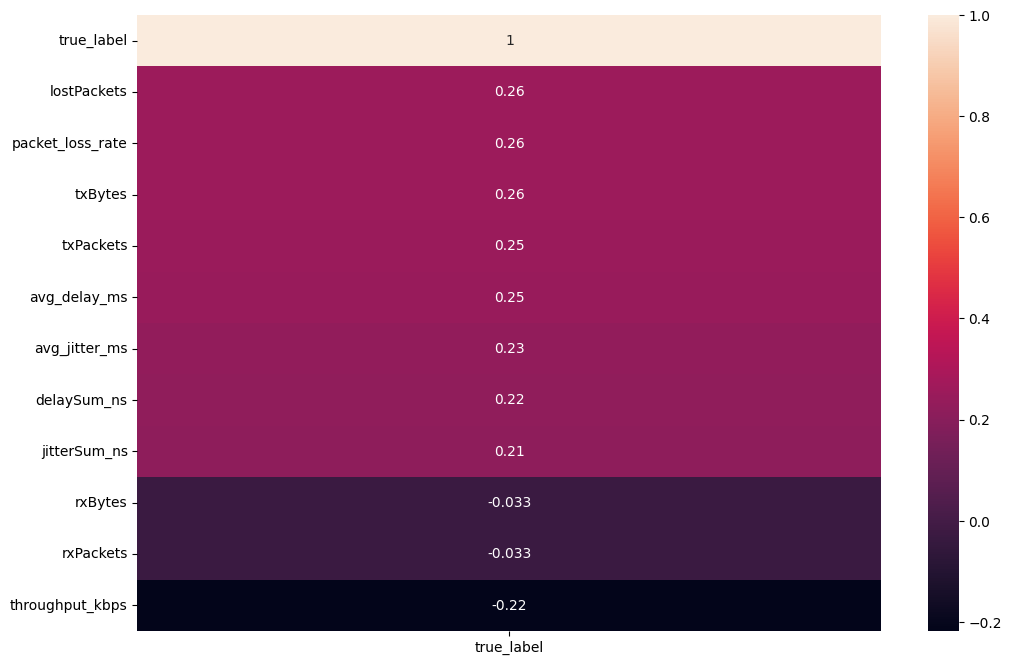

In [542]:
corr = df[features+["true_label"]].corr()
plt.figure(figsize=(12,8))
sns.heatmap(corr[['true_label']].sort_values(by='true_label', ascending=False), annot=True)


In [517]:
# Sadece sayısal feature'ları al
X = df[features]
y = df["true_label"]  # veya "is_anomaly"

In [518]:
y.value_counts()

true_label
0    11100
1     1296
Name: count, dtype: int64

### Isolation Forest

In [574]:
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import RandomUnderSampler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score, precision_score,recall_score,f1_score
rus = RandomUnderSampler(sampling_strategy={0: 3000, 1: 1296}, random_state=42)

X_resampled, y_resampled = rus.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42,stratify=y_resampled
)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [575]:
iso = IsolationForest(contamination=0.1, random_state=42)
iso.fit(X_train_scaled)

y_pred = iso.predict(X_test_scaled)
y_pred_bin = [1 if x == -1 else 0 for x in y_pred]

[[573  28]
 [197  62]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.84       601
           1       0.69      0.24      0.36       259

    accuracy                           0.74       860
   macro avg       0.72      0.60      0.60       860
weighted avg       0.73      0.74      0.69       860

Precision: 0.69
Recall: 0.24
Accuracy: 0.74
ROC AUC: 0.60


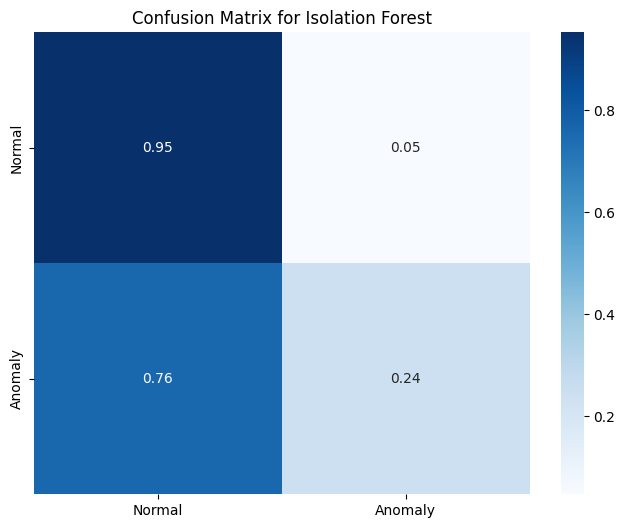

In [ ]:

### Plot conf matrix
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import confusion_matrix

import numpy as np

## acc
acc = (y_pred_bin == y_test).mean()

print(confusion_matrix(y_test, y_pred_bin))
print(classification_report(y_test, y_pred_bin))
precision = precision_score(y_test, y_pred_bin)
recall = recall_score(y_test, y_pred_bin)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {acc:.2f}")
print(f"ROC AUC: {roc_auc_score(y_test, y_pred_bin):.2f}")



def plot_confusion_matrix(y_true, y_pred, classes, title=None):
    cm = confusion_matrix(y_true, y_pred)
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(title if title else 'Confusion Matrix')

    plt.show()

plot_confusion_matrix(y_test, y_pred_bin, classes=['Normal', 'Anomaly'], title='Confusion Matrix for Isolation Forest')


### Local Outlier Factor

In [532]:
from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.1)
lof.fit(X_train_scaled)

y_test_pred = lof.fit_predict(X_test_scaled)
y_test_pred_bin = [1 if x == -1 else 0 for x in y_test_pred]

In [ ]:
## acc 
print("Accuracy: ", (y_test_pred_bin == y_test).mean())
print(confusion_matrix(y_test, y_test_pred_bin))
print(classification_report(y_test, y_test_pred_bin))


Accuracy:  0.7267441860465116
[[570  31]
 [204  55]]
              precision    recall  f1-score   support

           0       0.74      0.95      0.83       601
           1       0.64      0.21      0.32       259

    accuracy                           0.73       860
   macro avg       0.69      0.58      0.57       860
weighted avg       0.71      0.73      0.68       860



In [534]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_model(y_true, y_pred, model_name="Model"):
    print(f"🔎 {model_name} Evaluation\n")
    print(confusion_matrix(y_true, y_pred))
    print(classification_report(y_true, y_pred))

    plt.figure(figsize=(6,4))
    sns.heatmap(confusion_matrix(y_true, y_pred), annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

In [535]:
X_train

,txBytes,rxBytes,txPackets,rxPackets,lostPackets,delaySum_ns,jitterSum_ns,throughput_kbps,avg_delay_ms,avg_jitter_ms,packet_loss_rate
9090,2416,2416,7,7,0,403440000.0,83907200.0,78.124495,57.634286,11.986743,0.0
295,264,264,5,5,0,203062000.0,470400.0,14.613894,40.612400,0.094080,0.0
2899,2416,2416,7,7,0,431405000.0,153133000.0,65.739261,61.629286,21.876143,0.0
11789,340,340,4,4,0,176448000.0,16035200.0,12.477064,44.112000,4.008800,0.0
7915,2416,2416,7,7,0,458154000.0,143498000.0,67.509605,65.450571,20.499714,0.0
...,...,...,...,...,...,...,...,...,...,...,...
1923,2416,2416,7,7,0,437448000.0,135128000.0,69.280952,62.492571,19.304000,0.0
6838,2416,2416,7,7,0,472493000.0,115581000.0,64.534224,67.499000,16.511571,0.0
11777,340,340,4,4,0,203454000.0,20257600.0,11.643836,50.863500,5.064400,0.0
334,2416,2416,7,7,0,362778000.0,61713600.0,81.974722,51.825429,8.816229,0.0


🔎 Logistic Regression Evaluation

[[601   0]
 [239  20]]
              precision    recall  f1-score   support

           0       0.72      1.00      0.83       601
           1       1.00      0.08      0.14       259

    accuracy                           0.72       860
   macro avg       0.86      0.54      0.49       860
weighted avg       0.80      0.72      0.63       860



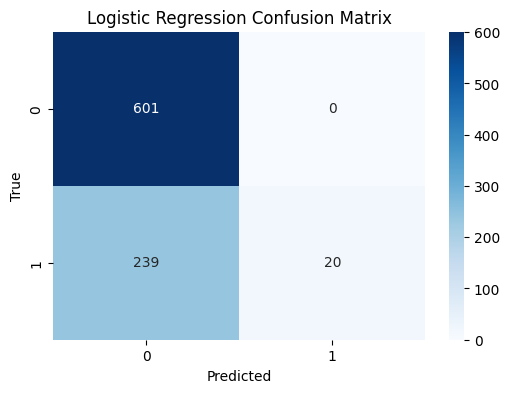

Accuracy: 0.72
ROC AUC: 0.54
Precision: 1.00
Recall: 0.08
F1 Score: 0.14


In [565]:
## Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score,precision_score, recall_score,f1_score

log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
evaluate_model(y_test, y_pred_log_reg, "Logistic Regression")
acc = (y_pred_log_reg == y_test).mean()
roc_auc = roc_auc_score(y_test, y_pred_log_reg)
precision = precision_score(y_test, y_pred_log_reg)
recall = recall_score(y_test, y_pred_log_reg)
f1_score = f1_score(y_test, y_pred_log_reg)
print(f"Accuracy: {acc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


🔎 SVM Evaluation

[[599   2]
 [200  59]]
              precision    recall  f1-score   support

           0       0.75      1.00      0.86       601
           1       0.97      0.23      0.37       259

    accuracy                           0.77       860
   macro avg       0.86      0.61      0.61       860
weighted avg       0.82      0.77      0.71       860



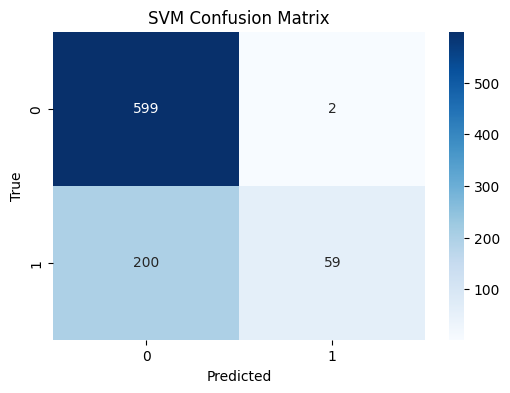

Accuracy: 0.77
ROC AUC: 0.61
Precision: 0.97
Recall: 0.23
F1 Score: 0.37


In [564]:
### SVM 
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score,precision_score, recall_score,f1_score

svm_model = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

evaluate_model(y_test, y_pred_svm, "SVM")
acc = (y_pred_svm == y_test).mean()
roc_auc = roc_auc_score(y_test, y_pred_svm)
precision = precision_score(y_test, y_pred_svm)
recall = recall_score(y_test, y_pred_svm)
f1_score = f1_score(y_test, y_pred_svm)
print(f"Accuracy: {acc:.2f}")
print(f"ROC AUC: {roc_auc:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1_score:.2f}")


🔎 Random Forest Evaluation

[[601   0]
 [  1 258]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       601
           1       1.00      1.00      1.00       259

    accuracy                           1.00       860
   macro avg       1.00      1.00      1.00       860
weighted avg       1.00      1.00      1.00       860



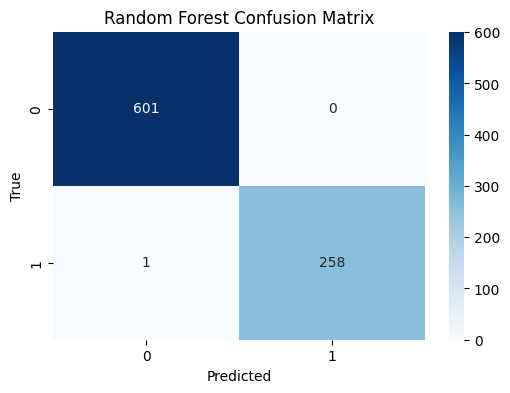

Accuracy: 1.00
ROC AUC: 1.00


In [560]:
### Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_scaled, y_train)
y_pred_rf = rf.predict(X_test_scaled)
evaluate_model(y_test, y_pred_rf, "Random Forest")

acc = (y_pred_rf == y_test).mean()
print(f"Accuracy: {acc:.2f}")

roc_auc = roc_auc_score(y_test, y_pred_rf)
print(f"ROC AUC: {roc_auc:.2f}")